In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request


In [2]:

# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))


Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_gk = pd.read_csv('final_gk.csv')
gk_pas_2023=pd.read_csv('gk_pas_2023.csv')
gk_pas_2022=pd.read_csv('gk_pas_2022.csv')
gk_pas_2021=pd.read_csv('gk_pas_2021.csv')
newbie=pd.read_csv('newbie.csv')
# Fill missing values with 0 in place
final_gk.fillna(0, inplace=True)
gk_pas_2023.fillna(0, inplace=True)
gk_pas_2022.fillna(0, inplace=True)
gk_pas_2021.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
final_gk

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
0,0,Jeremías Ledesma,ar ARG,GK,Cádiz,es La Liga,30.0,1993.0,104.0,104.0,9360.0,104.0,144.0,1.38,476.0,329.0,69.0,27.0,36.0,41.0,34.0,33.0,31.0,27.0,4.0,0.0,13.0,3.0,19.0,1.0,144.6,0.30,1.600000e+00,0.02,850.0,2361.0,36.0,2372.0,314.0,66.0,47.100,895.0,89.0,63.13,1693.0,115.0,7.0,49.0,0.72,34.40,793.0,1565.0,1671.0,3281.0,51.0,69401.0,60373.0,145.0,149.0,97.0,489.0,511.0,96.0,1030.0,2594.0,40.0,0,0.0,0.3,0.0,3.0,133.0,3.0,0.0,1.0,3.0,28.0,0.27,0.00,2944.0,3569.0,30.0,3602.0,1669.0,1044.0,28.31,34.32,0.29,34.63,16.05,10.04,3,0,3,0,0,0,0.03
1,1,Oliver Baumann,de GER,GK,Hoffenheim,de Bundesliga,33.0,1990.0,98.0,98.0,8820.0,98.0,165.0,1.68,448.0,284.0,63.0,32.0,21.0,45.0,19.0,19.0,16.0,10.0,3.0,3.0,19.0,1.0,24.0,4.0,151.3,0.34,-9.700000e+00,-0.10,478.0,1325.0,36.0,3609.0,529.0,30.0,30.830,669.0,36.0,33.37,1366.0,84.0,6.0,118.0,1.64,48.40,239.0,1082.0,3342.0,4289.0,78.0,81814.0,56426.0,903.0,904.0,100.0,1564.0,1583.0,99.0,835.0,1746.0,48.0,0,0.0,0.3,0.0,1.0,61.0,1.0,0.0,3.0,1.0,8.0,0.08,0.00,3565.0,4495.0,53.0,4541.0,2735.0,2408.0,36.38,45.87,0.54,46.34,27.91,24.57,3,0,0,0,0,3,0.01
2,2,Pau López,es ESP,GK,Roma+Marseille,it Serie A+fr Ligue 1,28.0,1994.0,83.0,81.0,7352.0,81.7,94.0,1.15,294.0,204.0,69.0,46.0,14.0,21.0,24.0,29.0,12.0,12.0,0.0,0.0,0.0,1.0,15.0,4.0,89.1,0.30,-9.000000e-01,-0.01,250.0,738.0,34.0,2669.0,384.0,21.0,28.670,440.0,40.0,36.47,815.0,48.0,6.0,76.0,1.38,52.40,177.0,558.0,2546.0,3113.0,82.0,61934.0,38777.0,549.0,551.0,100.0,1366.0,1383.0,99.0,625.0,1167.0,54.0,3,1.1,0.4,1.9,4.0,32.0,1.0,0.0,5.0,3.0,16.0,0.20,0.00,2178.0,3170.0,105.0,3273.0,2227.0,1855.0,26.66,38.80,1.29,40.06,27.26,22.71,3,0,0,1,2,0,0.04
3,3,Rui Patrício,pt POR,GK,Wolves+Roma,eng Premier League+it Serie A,35.0,1988.0,110.0,110.0,9899.0,110.0,129.0,1.17,402.0,276.0,69.0,47.0,26.0,37.0,38.0,35.0,17.0,14.0,3.0,0.0,18.0,4.0,17.0,6.0,115.1,0.29,-7.900000e+00,-0.07,469.0,1104.0,42.0,2038.0,408.0,39.0,34.430,730.0,41.0,34.37,1353.0,49.0,4.0,38.0,0.57,38.70,302.0,800.0,2067.0,2778.0,74.0,57837.0,40732.0,412.0,414.0,100.0,880.0,892.0,99.0,757.0,1442.0,52.0,0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,2.0,0.0,11.0,0.10,0.00,2655.0,2936.0,4.0,2940.0,1483.0,1086.0,24.14,26.69,0.04,26.73,13.48,9.87,3,1,0,2,0,0,0.00
4,4,Lukáš Hrádecký,fi FIN,GK,Leverkusen,de Bundesliga,33.0,1989.0,94.0,94.0,8414.0,93.5,120.0,1.28,379.0,261.0,69.0,44.0,24.0,26.0,25.0,27.0,13.0,10.0,2.0,2.0,15.0,4.0,11.0,4.0,109.8,0.29,-6.200000e+00,-0.07,396.0,1173.0

In [4]:
final_gk.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts', 'Min', '90s', 'Goals_Against', 'Goals_Against_per90',
       'Shots_on_Target_Against', 'Saves', 'Save%', 'W', 'D', 'L', 'CS', 'CS%',
       'PK_attempts', 'PK_Allowed', 'PKs_Saved', 'PK_missed',
       'Save%(Penalty Kicks)', 'Gk_free_kick_goals_against',
       'Gk_corner_kick_goals_against', 'Gk_own_goals_against', 'Gk_psxg',
       'Gk_psxg_per_shot_on_target_against', 'Gk_psxg_diff',
       'Gk_psxg_net_per90', 'Gk_passes_completed_launched',
       'Gk_passes_attempted_launched', 'Gk_passes_pct_launched', 'Gk_passes',
       'Gk_passes_throws', 'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
       'Gk_go

In [5]:
Onana=pd.read_csv('Onana_CL.csv')
Onana

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Shot_Creating_Action_per90,Goal_Creating_Action_per90,Touches,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Touches_Att_3rd,Touches_Att_Pen,Tocuhes_Live_Balls,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Carries,Total_Distance,Progressive_Distance_Carried,Progressive_Carries,1/3_Carries,Carries_Penalty_Area,Miscontrols,Dispossessed,Passes_Received,Progressive_Passes_Received,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90
0,0,0,0,André Onana,cm CMR,GK,it Inter,Champions League,26,1996,13,13,1170,13.0,11,0.85,57,47,80.7,7,3,3,8,61.5,0,0,0,0,0,0,2,1,17.6,0.31,7.6,0.58,84,191,44.0,437,63,34.6,34.0,88,45.5,40.4,196,14,7.1,3,0.23,10.1,0,0,407,525,77.5,11545,8251,84,84,100.0,178,181,98.3,141,256,55.1,0,0.0,0.0,0.0,0,12,0,0,0,0.31,0.08,550,474,544,6,0,0,550,1,0,0.0,0,0.0,363,1696,1026,0,0,0,0,0,303,0,42.31,36.46,41.85,0.46,0.0,0.0,42.31,0.08,0.0,0.0,27.92,130.46,78.92,0.0,0.0,0.0,0.0,0.0,23.31,0.0


In [6]:
# Defining a function to check if a league is in the 'Comp' column
def check_league_in_comp(row, league):
    if league in row['Comp']:
        return 1
    else:
        return 0

# Adding the new columns
Onana['Seasons at top 5'] = 1
Onana['Seasons in PL'] = Onana.apply(lambda row: check_league_in_comp(row, 'eng Premier League'), axis=1)
Onana['Seasons in Liga'] = Onana.apply(lambda row: check_league_in_comp(row, 'es La Liga'), axis=1)
Onana['Seasons in Serie A'] = 1
Onana['Seasons in Ligue 1'] = Onana.apply(lambda row: check_league_in_comp(row, 'fr Ligue 1'), axis=1)
Onana['Seasons in Bundesliga'] = Onana.apply(lambda row: check_league_in_comp(row, 'de Bundesliga'), axis=1)
Onana

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Shot_Creating_Action_per90,Goal_Creating_Action_per90,Touches,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Touches_Att_3rd,Touches_Att_Pen,Tocuhes_Live_Balls,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Carries,Total_Distance,Progressive_Distance_Carried,Progressive_Carries,1/3_Carries,Carries_Penalty_Area,Miscontrols,Dispossessed,Passes_Received,Progressive_Passes_Received,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,0,0,André Onana,cm CMR,GK,it Inter,Champions League,26,1996,13,13,1170,13.0,11,0.85,57,47,80.7,7,3,3,8,61.5,0,0,0,0,0,0,2,1,17.6,0.31,7.6,0.58,84,191,44.0,437,63,34.6,34.0,88,45.5,40.4,196,14,7.1,3,0.23,10.1,0,0,407,525,77.5,11545,8251,84,84,100.0,178,181,98.3,141,256,55.1,0,0.0,0.0,0.0,0,12,0,0,0,0.31,0.08,550,474,544,6,0,0,550,1,0,0.0,0,0.0,363,1696,1026,0,0,0,0,0,303,0,42.31,36.46,41.85,0.46,0.0,0.0,42.31,0.08,0.0,0.0,27.92,130.46,78.92,0.0,0.0,0.0,0.0,0.0,23.31,0.0,1,0,0,1,0,0


In [7]:
final_gk=final_gk[final_gk['90s']>=19]
final_gk=final_gk.reset_index(drop=True)
final_gk

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
0,0,Jeremías Ledesma,ar ARG,GK,Cádiz,es La Liga,30.0,1993.0,104.0,104.0,9360.0,104.0,144.0,1.38,476.0,329.0,69.0,27.0,36.0,41.0,34.0,33.0,31.0,27.0,4.0,0.0,13.0,3.0,19.0,1.0,144.6,0.30,1.600000e+00,0.02,850.0,2361.0,36.0,2372.0,314.0,66.0,47.100,895.0,89.0,63.13,1693.0,115.0,7.0,49.0,0.72,34.40,793.0,1565.0,1671.0,3281.0,51.0,69401.0,60373.0,145.0,149.0,97.0,489.0,511.0,96.0,1030.0,2594.0,40.0,0,0.0,0.3,0.0,3.0,133.0,3.0,0.0,1.0,3.0,28.0,0.27,0.00,2944.0,3569.0,30.0,3602.0,1669.0,1044.0,28.31,34.32,0.29,34.63,16.05,10.04,3,0,3,0,0,0,0.03
1,1,Oliver Baumann,de GER,GK,Hoffenheim,de Bundesliga,33.0,1990.0,98.0,98.0,8820.0,98.0,165.0,1.68,448.0,284.0,63.0,32.0,21.0,45.0,19.0,19.0,16.0,10.0,3.0,3.0,19.0,1.0,24.0,4.0,151.3,0.34,-9.700000e+00,-0.10,478.0,1325.0,36.0,3609.0,529.0,30.0,30.830,669.0,36.0,33.37,1366.0,84.0,6.0,118.0,1.64,48.40,239.0,1082.0,3342.0,4289.0,78.0,81814.0,56426.0,903.0,904.0,100.0,1564.0,1583.0,99.0,835.0,1746.0,48.0,0,0.0,0.3,0.0,1.0,61.0,1.0,0.0,3.0,1.0,8.0,0.08,0.00,3565.0,4495.0,53.0,4541.0,2735.0,2408.0,36.38,45.87,0.54,46.34,27.91,24.57,3,0,0,0,0,3,0.01
2,2,Pau López,es ESP,GK,Roma+Marseille,it Serie A+fr Ligue 1,28.0,1994.0,83.0,81.0,7352.0,81.7,94.0,1.15,294.0,204.0,69.0,46.0,14.0,21.0,24.0,29.0,12.0,12.0,0.0,0.0,0.0,1.0,15.0,4.0,89.1,0.30,-9.000000e-01,-0.01,250.0,738.0,34.0,2669.0,384.0,21.0,28.670,440.0,40.0,36.47,815.0,48.0,6.0,76.0,1.38,52.40,177.0,558.0,2546.0,3113.0,82.0,61934.0,38777.0,549.0,551.0,100.0,1366.0,1383.0,99.0,625.0,1167.0,54.0,3,1.1,0.4,1.9,4.0,32.0,1.0,0.0,5.0,3.0,16.0,0.20,0.00,2178.0,3170.0,105.0,3273.0,2227.0,1855.0,26.66,38.80,1.29,40.06,27.26,22.71,3,0,0,1,2,0,0.04
3,3,Rui Patrício,pt POR,GK,Wolves+Roma,eng Premier League+it Serie A,35.0,1988.0,110.0,110.0,9899.0,110.0,129.0,1.17,402.0,276.0,69.0,47.0,26.0,37.0,38.0,35.0,17.0,14.0,3.0,0.0,18.0,4.0,17.0,6.0,115.1,0.29,-7.900000e+00,-0.07,469.0,1104.0,42.0,2038.0,408.0,39.0,34.430,730.0,41.0,34.37,1353.0,49.0,4.0,38.0,0.57,38.70,302.0,800.0,2067.0,2778.0,74.0,57837.0,40732.0,412.0,414.0,100.0,880.0,892.0,99.0,757.0,1442.0,52.0,0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,2.0,0.0,11.0,0.10,0.00,2655.0,2936.0,4.0,2940.0,1483.0,1086.0,24.14,26.69,0.04,26.73,13.48,9.87,3,1,0,2,0,0,0.00
4,4,Lukáš Hrádecký,fi FIN,GK,Leverkusen,de Bundesliga,33.0,1989.0,94.0,94.0,8414.0,93.5,120.0,1.28,379.0,261.0,69.0,44.0,24.0,26.0,25.0,27.0,13.0,10.0,2.0,2.0,15.0,4.0,11.0,4.0,109.8,0.29,-6.200000e+00,-0.07,396.0,1173.0

In [8]:
Onana

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Shot_Creating_Action_per90,Goal_Creating_Action_per90,Touches,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Touches_Att_3rd,Touches_Att_Pen,Tocuhes_Live_Balls,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Carries,Total_Distance,Progressive_Distance_Carried,Progressive_Carries,1/3_Carries,Carries_Penalty_Area,Miscontrols,Dispossessed,Passes_Received,Progressive_Passes_Received,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,0,0,André Onana,cm CMR,GK,it Inter,Champions League,26,1996,13,13,1170,13.0,11,0.85,57,47,80.7,7,3,3,8,61.5,0,0,0,0,0,0,2,1,17.6,0.31,7.6,0.58,84,191,44.0,437,63,34.6,34.0,88,45.5,40.4,196,14,7.1,3,0.23,10.1,0,0,407,525,77.5,11545,8251,84,84,100.0,178,181,98.3,141,256,55.1,0,0.0,0.0,0.0,0,12,0,0,0,0.31,0.08,550,474,544,6,0,0,550,1,0,0.0,0,0.0,363,1696,1026,0,0,0,0,0,303,0,42.31,36.46,41.85,0.46,0.0,0.0,42.31,0.08,0.0,0.0,27.92,130.46,78.92,0.0,0.0,0.0,0.0,0.0,23.31,0.0,1,0,0,1,0,0


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

relevant_columns=['Goals_Against', 'Goals_Against_per90',
        'Saves', 'Save%','Gk_free_kick_goals_against','Gk_corner_kick_goals_against', 
        'Gk_own_goals_against', 'Gk_psxg_diff','Gk_psxg_net_per90', 
        'Gk_passes_completed_launched','Gk_passes_attempted_launched',
        'Gk_passes_pct_launched', 'Gk_passes','Gk_passes_throws',
        'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
        'Passes_Total_Cmp','Passes_Total_Att', 'Passes_Total_Cmp%', 
        'Passes_TotDist','Passes_PrgDist', 'Passes_Short_Cmp', 
        'Passes_Short_Att','Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att','Passes_Medium_Cmp%', 'Passes_Long_Cmp', 
        'Passes_Long_Att','Passes_Long_Cmp%',  'Passes_1/3',
        'Shot_Creating_Action_per90', 'Goal_Creating_Action_per90',
        'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 
        'Carries_per_90','Passes_Received_per_90']

# Step 1: Standardize the data
scaler = StandardScaler()
final_gk_scaled = scaler.fit_transform(final_gk[relevant_columns])
onana_scaled = scaler.transform(Onana[relevant_columns])

# Step 2: Concatenate dataframes
combined_data = pd.concat([Onana[relevant_columns], final_gk[relevant_columns]], axis=0)

# Step 3: Calculate cosine similarity with signed magnitudes
cosine_sim_signed = np.dot(onana_scaled, final_gk_scaled.T)
magnitude_onana = np.linalg.norm(onana_scaled, axis=1, keepdims=True)
magnitude_final_gk = np.linalg.norm(final_gk_scaled, axis=1, keepdims=True)
cosine_similarity_signed = cosine_sim_signed / (magnitude_onana * magnitude_final_gk.T)

# Step 4: Create a new dataframe to store the similarity scores and goalkeeper names
similarity_df = pd.DataFrame({'Player': final_gk['Player'], 'Similarity': cosine_similarity_signed[0],'League':final_gk['Comp'],'Squad':final_gk['Squad'],'Age':final_gk['Age'],'Seasons at top 5': final_gk['Seasons at top 5'],'Seasons in PL': final_gk['Seasons in PL'] ,'Seasons in Liga':final_gk['Seasons in Liga'],'Seasons in Serie A':final_gk['Seasons in Serie A'],'Seasons in Ligue 1': final_gk['Seasons in Ligue 1'],'Seasons in Bundesliga':final_gk['Seasons in Bundesliga']})

# Sort the goalkeepers based on similarity scores in descending order
similarity_df = similarity_df.sort_values(by='Similarity', ascending=False, ignore_index=True)

# Goalkeepers most similar to Onana
most_similar_goalkeepers = similarity_df.head(5)

# Goalkeepers least similar to Onana
least_similar_goalkeepers = similarity_df.tail(5)

# Now you have the most similar and least similar goalkeepers to Onana based on cosine similarity with signed magnitudes.
# You can further analyze their specific goalkeeping and passing attributes to understand the similarities and differences.


In [10]:
similarity_df

,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,Frederik Rønnow,0.779973,de Bundesliga,Union Berlin+Schalke 04,29.0,2,0,0,0,0,2
1,Brice Samba,0.774331,fr Ligue 1,Lens,28.0,1,0,0,0,1,0
2,Yehvann Diouf,0.766234,fr Ligue 1,Reims,22.0,1,0,0,0,1,0
3,Mory Diaw,0.753839,fr Ligue 1,Clermont Foot,29.0,1,0,0,0,1,0
4,Paulo Gazzaniga,0.753336,es La Liga,Girona,30.0,1,0,1,0,0,0
5,Claudio Bravo,0.714570,es La Liga,Betis,40.0,3,0,3,0,0,0
6,Yvon Mvogo,0.688205,fr Ligue 1,Lorient,28.0,1,0,0,0,1,0
7,Mattia Perin,0.673763,it Serie A,Juventus+Genoa,29.0,2,0,0,2,0,0
8,Gerónimo Rulli,0.668959,es La Liga,Villarreal,30.0,2,0,2,0,0,0
9,Lucas Chevalier,0.662174,fr Ligue 1,Lille,20.0,1,0,0,0,1,0


In [11]:
Diouf=gk_pas_2023[gk_pas_2023['Player']=='Yehvann Diouf']
Diouf

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90
24,41,41,41,Yehvann Diouf,fr FRA,GK,Reims,fr Ligue 1,22,1999,31,31,2790,31.0,31.0,1.0,137.0,107.0,78.1,11,12.0,8.0,14.0,45.2,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,37.0,0.27,7.0,0.22,136.0,308.0,44.2,874.0,191.0,28.3,31.8,185.0,33.0,34.3,430.0,40.0,9.3,35.0,1.13,12.7,61,247,851.0,1063.0,80.1,23462.0,15373.0,97.0,98.0,99.0,460.0,466.0,98.7,289.0,490.0,59.0,0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,1.0,4.0,0.13,0.03,914.0,1131.0,7.0,1138.0,843.0,543.0,29.48,36.48,0.23,36.71,27.19,17.52


In [12]:
Samba=gk_pas_2023[gk_pas_2023['Player']=='Brice Samba']
Samba

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90
95,159,159,169,Brice Samba,fr FRA,GK,Lens,fr Ligue 1,28,1994,37,37,3330,37.0,28.0,0.76,125.0,98.0,80.0,24,9.0,4.0,15.0,40.5,3.0,3.0,0.0,0.0,0.0,0.0,6.0,1.0,32.4,0.24,5.4,0.15,174.0,435.0,40.0,1075.0,140.0,35.5,33.3,160.0,33.1,32.7,384.0,34.0,8.9,41.0,1.11,15.4,52,381,938.0,1237.0,75.8,25038.0,16717.0,208.0,209.0,99.5,395.0,402.0,98.3,320.0,607.0,52.7,0,0.1,0.0,-0.1,1.0,17.0,1.0,0.0,1.0,0.0,3.0,0.08,0.0,942.0,1291.0,18.0,1307.0,987.0,712.0,25.46,34.89,0.49,35.32,26.68,19.24


In [13]:
Diaw=gk_pas_2023[gk_pas_2023['Player']=='Mory Diaw']
Diaw

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90
22,39,39,39,Mory Diaw,sn SEN,GK,Clermont Foot,fr Ligue 1,29,1993,37,37,3330,37.0,47.0,1.27,161.0,110.0,75.8,17,8.0,12.0,10.0,27.0,12.0,8.0,4.0,0.0,33.3,0.0,5.0,0.0,55.4,0.28,8.4,0.23,235.0,601.0,39.1,1209.0,173.0,40.0,37.0,255.0,45.9,40.4,464.0,34.0,7.3,25.0,0.68,11.5,117,483,1034.0,1467.0,70.5,30947.0,21906.0,160.0,163.0,98.2,455.0,467.0,97.4,412.0,826.0,49.9,0,0.2,0.1,-0.2,4.0,34.0,3.0,0.0,0.0,0.0,7.0,0.19,0.0,1266.0,1549.0,12.0,1561.0,1064.0,698.0,34.22,41.86,0.32,42.19,28.76,18.86


In [14]:

df_goalkeepers = gk_pas_2023.reset_index(drop=True)

df_goalkeepers = pd.concat([df_goalkeepers, Onana], ignore_index=True)


In [15]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
onana_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[-1]],0)

# Print the percentile ranks for André Onana
print(onana_percentile_ranks)


     Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
124                  7.0   95.0              100.0                    74.0   

     Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
124               75.0               81.0                50.0   

     Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
124              81.0                        84.0                    94.0   

     Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
124                    81.0                    70.0   

     Tocuhes_Live_Balls_per_90  Carries_per_90  Passes_Received_per_90  
124                       82.0            86.0                    82.0  


In [16]:
onana_percentile_ranks_list = onana_percentile_ranks.values.flatten().tolist()
onana_percentile_ranks_list[0] = 100 - onana_percentile_ranks_list[0] 
onana_percentile_ranks_list

[93.0,
 95.0,
 100.0,
 74.0,
 75.0,
 81.0,
 50.0,
 81.0,
 84.0,
 94.0,
 81.0,
 70.0,
 82.0,
 86.0,
 82.0]

In [17]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of Samba's stats from the percentile ranks DataFrame
samba_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[95]],0)

# Print the percentile ranks for Samba
print(samba_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
95                  6.0   94.0               84.0                    93.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
95               64.0               56.0                50.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
95              74.0                        29.0                     9.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
95                    35.0                    72.0                       36.0   

    Carries_per_90  Passes_Received_per_90  
95            80.0                    61.0  


In [18]:
samba_percentile_ranks_list = samba_percentile_ranks.values.flatten().tolist()
samba_percentile_ranks_list[0] = 100 - samba_percentile_ranks_list[0] 
samba_percentile_ranks_list

[94.0,
 94.0,
 84.0,
 93.0,
 64.0,
 56.0,
 50.0,
 74.0,
 29.0,
 9.0,
 35.0,
 72.0,
 36.0,
 80.0,
 61.0]

In [19]:
import pandas as pd






params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of Mory Diaw's stats from the percentile ranks DataFrame
diaw_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[22]],0)

# Print the percentile ranks for Mory Diaw

print(diaw_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
22                 42.0   83.0               93.0                    77.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
22               44.0               15.0                20.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
22              63.0                        64.0                    79.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
22                    82.0                    63.0                       79.0   

    Carries_per_90  Passes_Received_per_90  
22            90.0                    60.0  


In [20]:
diaw_percentile_ranks_list = diaw_percentile_ranks.values.flatten().tolist()
diaw_percentile_ranks_list[0] = 100 - diaw_percentile_ranks_list[0] 
diaw_percentile_ranks_list

[58.0,
 83.0,
 93.0,
 77.0,
 44.0,
 15.0,
 20.0,
 63.0,
 64.0,
 79.0,
 82.0,
 63.0,
 79.0,
 90.0,
 60.0]

In [21]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
diouf_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[22]],0)

# Print the percentile ranks for Diouf
print(diouf_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
22                 42.0   83.0               93.0                    77.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
22               44.0               15.0                20.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
22              63.0                        64.0                    79.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
22                    82.0                    63.0                       79.0   

    Carries_per_90  Passes_Received_per_90  
22            90.0                    60.0  


In [22]:
diouf_percentile_ranks_list = diouf_percentile_ranks.values.flatten().tolist()
diouf_percentile_ranks_list[0] = 100 - diouf_percentile_ranks_list[0] 
diouf_percentile_ranks_list

[58.0,
 83.0,
 93.0,
 77.0,
 44.0,
 15.0,
 20.0,
 63.0,
 64.0,
 79.0,
 82.0,
 63.0,
 79.0,
 90.0,
 60.0]

In [23]:
import matplotlib.pyplot as plt
from mplsoccer import  PyPizza

baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

In [24]:


image_path = "Onana.png"
fdj_cropped = Image.open(image_path)


In [25]:
image_path='Samba.jpg'
dj_cropped = Image.open(image_path)

In [26]:
image_path='diaw.jpeg'
j_cropped = Image.open(image_path)

In [27]:
image_path='Diouf.jpg'
j= Image.open(image_path)

In [28]:
split_params = [param.replace('_', '\n') for param in params]


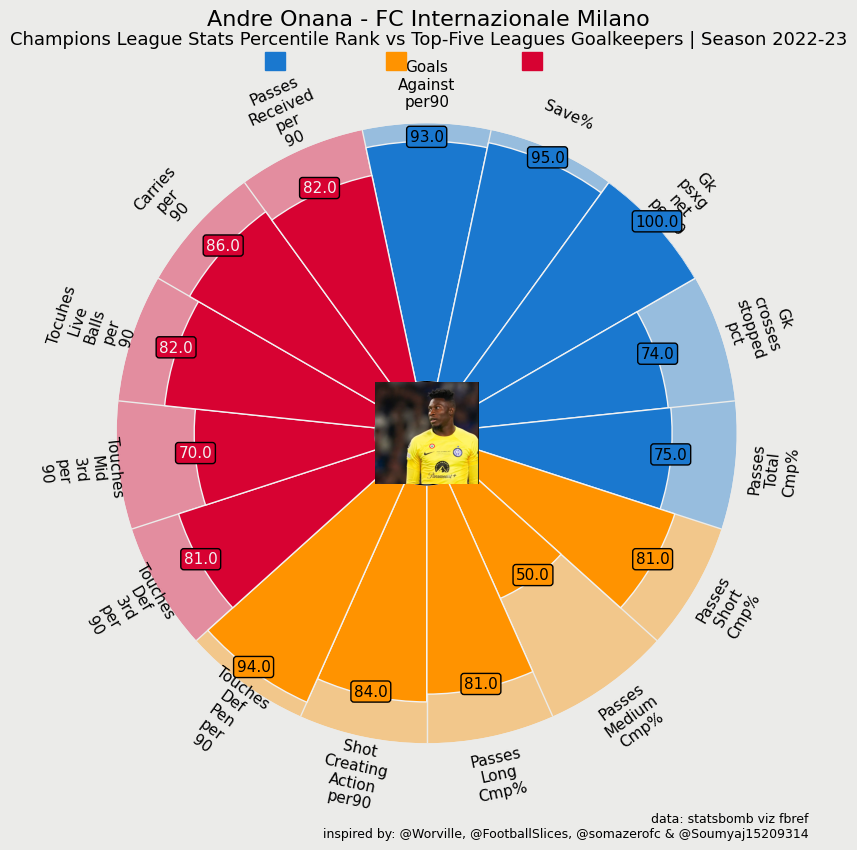

In [29]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    onana_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Andre Onana - FC Internazionale Milano", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Champions League Stats Percentile Rank vs Top-Five Leagues Goalkeepers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Onana_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


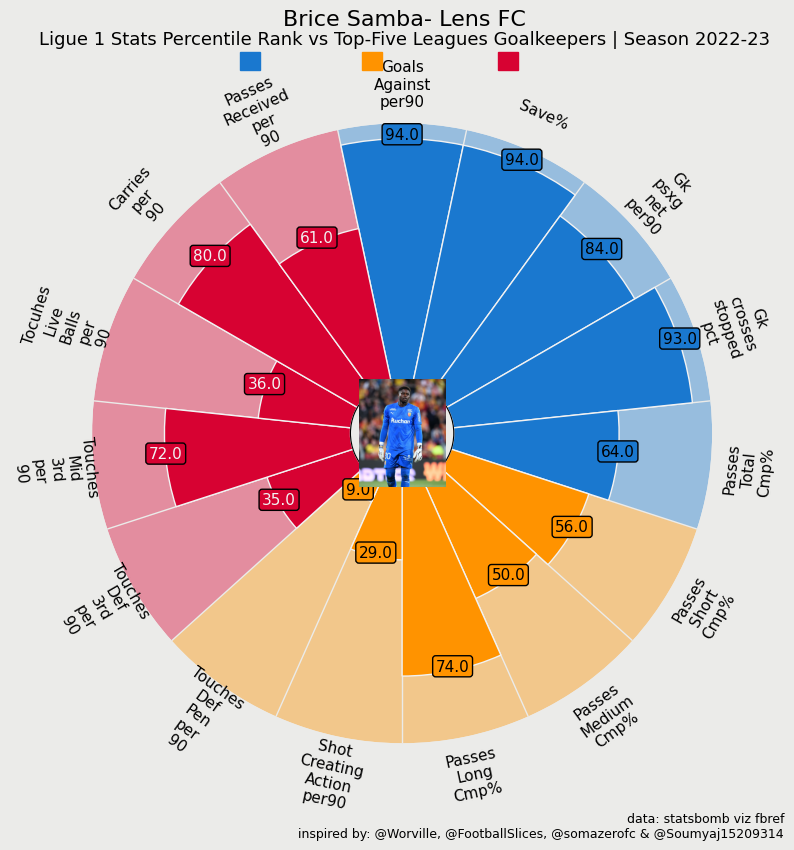

In [30]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    samba_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Brice Samba- Lens FC", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Goalkeepers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
dj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.savefig('Samba_Percentile.png',dpi=500,bbox_inches = 'tight')


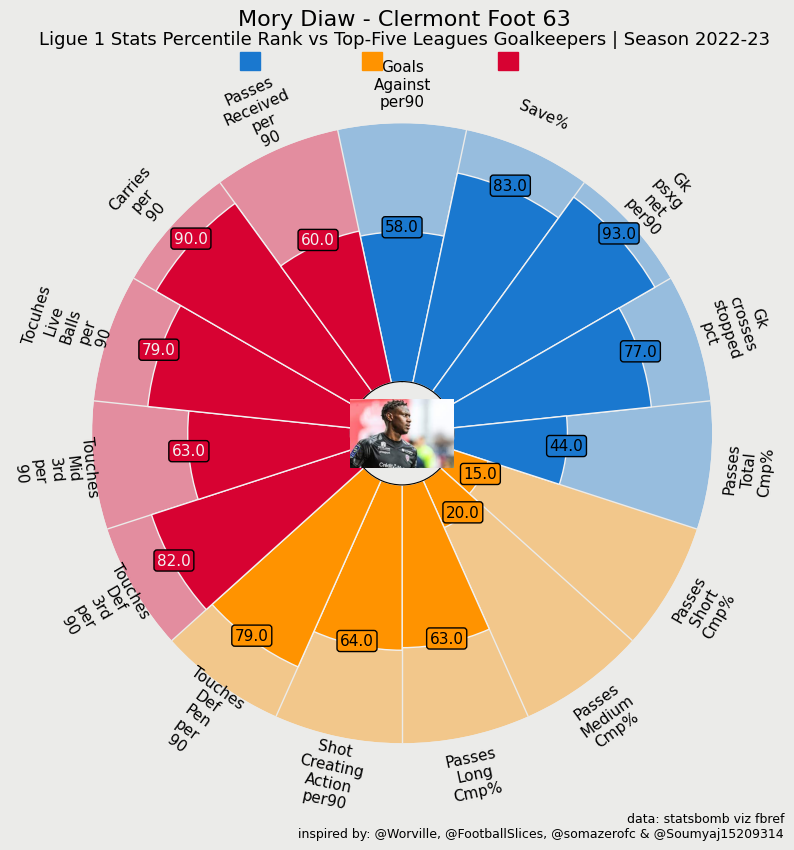

In [31]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    diaw_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Mory Diaw - Clermont Foot 63", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Goalkeepers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
j_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.savefig('Diaw_Percentile.png',dpi=500,bbox_inches = 'tight')


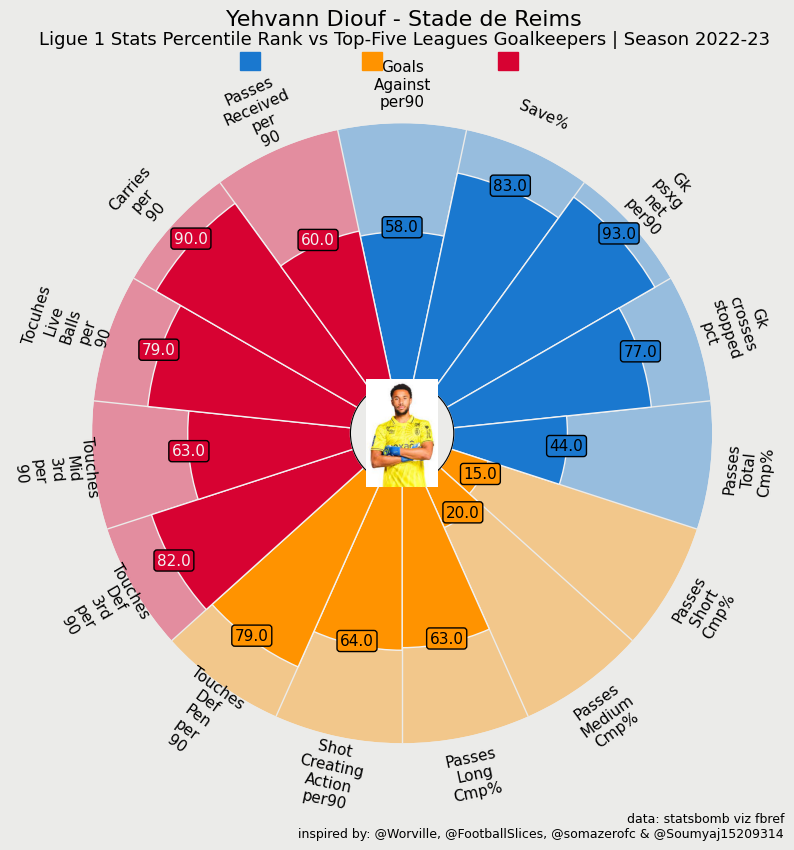

In [32]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    diouf_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Yehvann Diouf - Stade de Reims", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Goalkeepers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
j, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.savefig('Diouf_Percentile.png',dpi=500,bbox_inches = 'tight')


In [33]:
# Get the names of newbie goalkeepers
newbie_goalkeepers_names = set(newbie['Player'])

# Filter out newbie goalkeepers from final_gk DataFrame
final = final_gk[~final_gk['Player'].isin(newbie_goalkeepers_names)]

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

relevant_columns=['Goals_Against', 'Goals_Against_per90',
        'Saves', 'Save%','Gk_free_kick_goals_against','Gk_corner_kick_goals_against', 
        'Gk_own_goals_against', 'Gk_psxg_diff','Gk_psxg_net_per90', 
        'Gk_passes_completed_launched','Gk_passes_attempted_launched',
        'Gk_passes_pct_launched', 'Gk_passes','Gk_passes_throws',
        'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
        'Passes_Total_Cmp','Passes_Total_Att', 'Passes_Total_Cmp%', 
        'Passes_TotDist','Passes_PrgDist', 'Passes_Short_Cmp', 
        'Passes_Short_Att','Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att','Passes_Medium_Cmp%', 'Passes_Long_Cmp', 
        'Passes_Long_Att','Passes_Long_Cmp%',  'Passes_1/3',
        'Shot_Creating_Action_per90', 'Goal_Creating_Action_per90',
        'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 
        'Carries_per_90','Passes_Received_per_90']

# Step 1: Standardize the data
scaler = StandardScaler()
final_gk_scaled = scaler.fit_transform(final[relevant_columns])
onana_scaled = scaler.transform(Onana[relevant_columns])

# Step 2: Concatenate dataframes
combined_data = pd.concat([Onana[relevant_columns], final[relevant_columns]], axis=0)

# Step 3: Calculate cosine similarity with signed magnitudes
cosine_sim_signed = np.dot(onana_scaled, final_gk_scaled.T)
magnitude_onana = np.linalg.norm(onana_scaled, axis=1, keepdims=True)
magnitude_final_gk = np.linalg.norm(final_gk_scaled, axis=1, keepdims=True)
cosine_similarity_signed = cosine_sim_signed / (magnitude_onana * magnitude_final_gk.T)

# Step 4: Create a new dataframe to store the similarity scores and goalkeeper names
similarity_df = pd.DataFrame({'Player': final['Player'], 'Similarity': cosine_similarity_signed[0],'League':final['Comp'],'Squad':final['Squad'],'Age':final['Age'],'Seasons at top 5': final['Seasons at top 5'],'Seasons in PL': final['Seasons in PL'] ,'Seasons in Liga':final['Seasons in Liga'],'Seasons in Serie A':final['Seasons in Serie A'],'Seasons in Ligue 1': final['Seasons in Ligue 1'],'Seasons in Bundesliga':final['Seasons in Bundesliga']})

# Sort the goalkeepers based on similarity scores in descending order
similarity_df = similarity_df.sort_values(by='Similarity', ascending=False, ignore_index=True)

# Goalkeepers most similar to Onana
most_similar_goalkeepers = similarity_df.head(5)

# Goalkeepers least similar to Onana
least_similar_goalkeepers = similarity_df.tail(5)

# Now you have the most similar and least similar goalkeepers to Onana based on cosine similarity with signed magnitudes.
# You can further analyze their specific goalkeeping and passing attributes to understand the similarities and differences.


In [35]:
similarity_df

,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,Gerónimo Rulli,0.775526,es La Liga,Villarreal,30.0,2,0,2,0,0,0
1,Frederik Rønnow,0.768361,de Bundesliga,Union Berlin+Schalke 04,29.0,2,0,0,0,0,2
2,Mattia Perin,0.750801,it Serie A,Juventus+Genoa,29.0,2,0,0,2,0,0
3,Claudio Bravo,0.727760,es La Liga,Betis,40.0,3,0,3,0,0,0
4,Benjamin Lecomte,0.714264,es La Liga+fr Ligue 1+fr Ligue 1,Espanyol+Montpellier+Monaco,31.0,2,0,1,0,2,0
5,Ivo Grbić,0.624148,es La Liga+fr Ligue 1,Atlético Madrid+Lille,26.0,2,0,1,0,1,0
6,Keylor Navas,0.592590,fr Ligue 1+eng Premier League,Paris S-G+Nott'ham Forest,36.0,3,1,0,0,2,0
7,Jordi Masip,0.580423,es La Liga,Valladolid,33.0,2,0,2,0,0,0
8,Dean Henderson,0.528536,eng Premier League,Nott'ham Forest+Manchester Utd,25.0,2,2,0,0,0,0
9,Ralf Fährmann,0.523312,de Bundesliga,Schalke 04,33.0,2,0,0,0,0,2


In [36]:
final[final_gk['Player']=='Gerónimo Rulli']

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
72,72,Gerónimo Rulli,ar ARG,GK,Villarreal,es La Liga,30.0,1992.0,46.0,46.0,4140.0,46.0,38.0,0.83,156.0,118.0,76.0,20.0,12.0,14.0,21.0,46.0,4.0,3.0,1.0,0.0,25.0,0.0,3.0,1.0,40.7,0.26,3.7,0.08,181.0,452.0,40.0,1524.0,231.0,22.0,29.25,306.0,38.0,37.65,693.0,42.0,6.0,73.0,1.59,16.0,116.0,334.0,1515.0,1831.0,83.0,38419.0,24481.0,298.0,302.0,99.0,842.0,852.0,99.0,368.0,666.0,55.0,0,0.0,0.1,0.0,0.0,21.0,2.0,0.0,2.0,1.0,7.0,0.15,0.0,1490.0,1929.0,12.0,1940.0,1131.0,967.0,32.39,41.93,0.26,42.17,24.59,21.02,2,0,2,0,0,0,0.02


In [37]:
final[final_gk['Player']=='Frederik Rønnow']

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
81,81,Frederik Rønnow,dk DEN,GK,Union Berlin+Schalke 04,de Bundesliga,29.0,1992.0,40.0,39.0,3555.0,39.5,51.0,1.29,186.0,137.0,74.0,16.0,11.0,12.0,12.0,30.0,9.0,9.0,0.0,0.0,0.0,0.0,10.0,2.0,56.8,0.31,7.8,0.2,284.0,722.0,39.0,1395.0,176.0,41.0,33.2,258.0,59.0,44.05,566.0,51.0,9.0,42.0,1.06,13.85,151.0,570.0,1175.0,1660.0,71.0,34199.0,25795.0,206.0,207.0,100.0,581.0,583.0,100.0,383.0,857.0,45.0,1,0.0,0.2,1.0,1.0,70.0,3.0,0.0,0.0,3.0,31.0,0.78,0.0,1265.0,1742.0,24.0,1765.0,1069.0,899.0,32.03,44.1,0.61,44.68,27.06,22.76,2,0,0,0,0,2,0.08


In [38]:

df_goalkeepers = final.reset_index(drop=True)

df_goalkeepers = pd.concat([df_goalkeepers, Onana], ignore_index=True)


In [39]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
rulli_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[72]],0)

# Print the percentile ranks for Bounp
print(rulli_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
72                  5.0   97.0               90.0                    70.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
72               90.0               43.0                83.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
72              85.0                        74.0                    70.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
72                    85.0                    49.0                       83.0   

    Carries_per_90  Passes_Received_per_90  
72            83.0                    79.0  


In [40]:
rulli_percentile_ranks_list = rulli_percentile_ranks.values.flatten().tolist()
rulli_percentile_ranks_list[0] = 100 - rulli_percentile_ranks_list[0] 
rulli_percentile_ranks_list

[95.0,
 97.0,
 90.0,
 70.0,
 90.0,
 43.0,
 83.0,
 85.0,
 74.0,
 70.0,
 85.0,
 49.0,
 83.0,
 83.0,
 79.0]

In [41]:
Bv=[95.0,97.0,90.0,70.0,90.0,43.0,93.0, 85.0,74.0 , 70.0, 85.0 , 49.0 , 83.0,  83.0 ,79.0 ]

In [42]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
fede_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[81]],0)

# Print the percentile ranks for Bounp
print(fede_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
81                 45.0   93.0               98.0                    98.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
81               47.0               84.0                99.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
81              39.0                       100.0                    67.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
81                    93.0                    88.0                       93.0   

    Carries_per_90  Passes_Received_per_90  
81            91.0                    87.0  


In [43]:
fede_percentile_ranks_list = fede_percentile_ranks.values.flatten().tolist()
fede_percentile_ranks_list[0] = 100 - fede_percentile_ranks_list[0] 
fede_percentile_ranks_list

[55.0,
 93.0,
 98.0,
 98.0,
 47.0,
 84.0,
 99.0,
 39.0,
 100.0,
 67.0,
 93.0,
 88.0,
 93.0,
 91.0,
 87.0]

In [44]:


image_path = "Rulli.jpg"
cropped = Image.open(image_path)


In [45]:


image_path = "Frede.jpg"
ropped = Image.open(image_path)


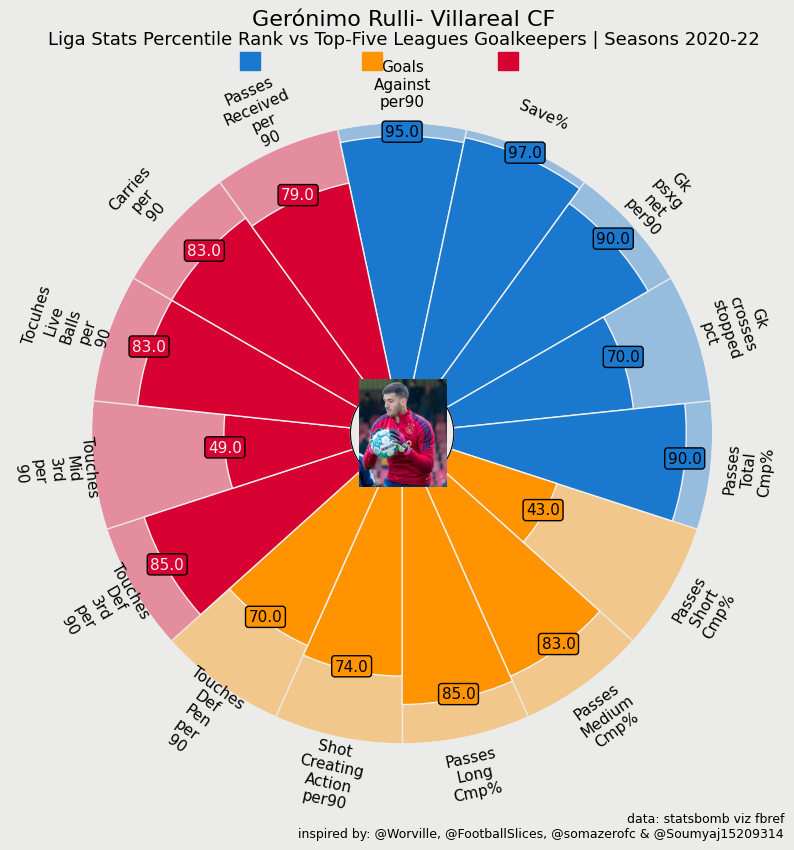

In [46]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    rulli_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Gerónimo Rulli- Villareal CF", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Liga Stats Percentile Rank vs Top-Five Leagues Goalkeepers | Seasons 2020-22",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.savefig('Rulli_Percentile.png',dpi=500,bbox_inches = 'tight')


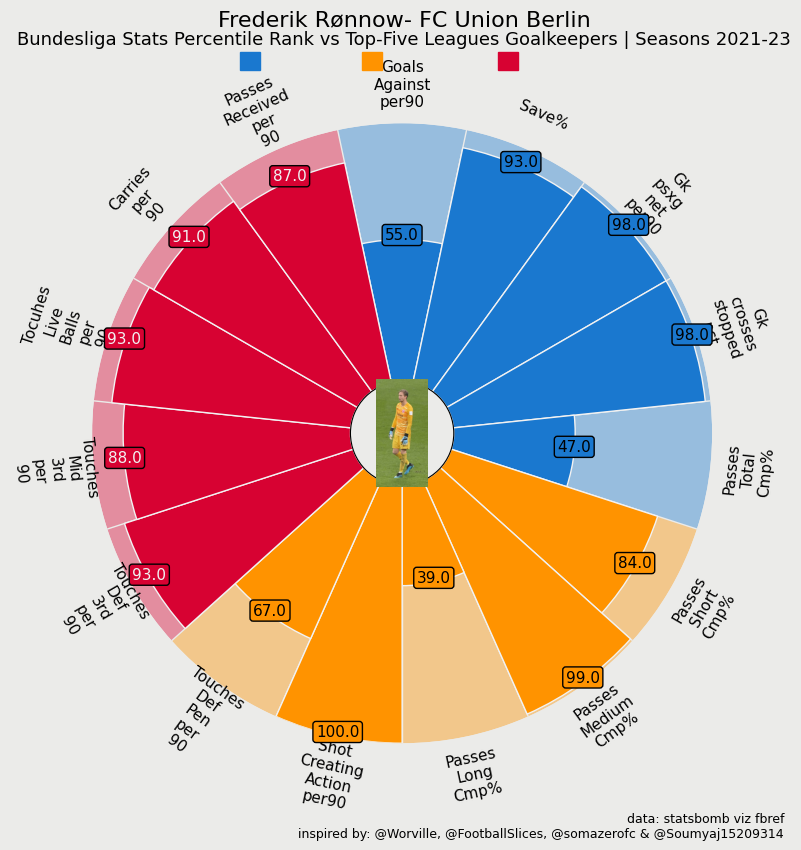

In [47]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    fede_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Frederik Rønnow- FC Union Berlin", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Goalkeepers | Seasons 2021-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
ropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.savefig('Fede_Percentile.png',dpi=500,bbox_inches = 'tight')
